<a href="https://colab.research.google.com/github/mahirg8/Task1-Predict-Restaurant-Ratings/blob/main/Task_1_Restaurant_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 1: Predict Restaurant Ratings**

 **Name : Mahir Gautam**

**Machine Learning Intern, Cognifyz Tech**

Objective: Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

In [2]:
#importing dataset
df = pd.read_csv('/content/Dataset .csv')

In [3]:
#reading first five rows of datasets
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Data Processing and splitting**

In [4]:
#checking null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
#removing null values row
df = df.dropna()

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.shape

(9542, 21)

In [8]:
#drop features
df =df.drop('Restaurant ID', axis=1)
df =df.drop('Restaurant Name', axis=1)
df =df.drop('Country Code', axis=1)
df =df.drop('City', axis=1)
df =df.drop('Address', axis=1)
df =df.drop('Locality', axis=1)
df =df.drop('Locality Verbose', axis=1)
df =df.drop('Longitude', axis=1)
df =df.drop('Latitude', axis=1)
df =df.drop('Cuisines', axis=1)
df =df.drop('Currency', axis=1)

In [9]:
print(df.describe())

       Average Cost for two  Price range  Aggregate rating         Votes
count           9542.000000  9542.000000       9542.000000   9542.000000
mean            1200.326137     1.804968          2.665238    156.772060
std            16128.743876     0.905563          1.516588    430.203324
min                0.000000     1.000000          0.000000      0.000000
25%              250.000000     1.000000          2.500000      5.000000
50%              400.000000     2.000000          3.200000     31.000000
75%              700.000000     2.000000          3.700000    130.000000
max           800000.000000     4.000000          4.900000  10934.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9542 non-null   int64  
 1   Has Table booking     9542 non-null   object 
 2   Has Online delivery   9542 non-null   object 
 3   Is delivering now     9542 non-null   object 
 4   Switch to order menu  9542 non-null   object 
 5   Price range           9542 non-null   int64  
 6   Aggregate rating      9542 non-null   float64
 7   Rating color          9542 non-null   object 
 8   Rating text           9542 non-null   object 
 9   Votes                 9542 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 820.0+ KB


In [11]:
# encode the yes-no labels of categorical features into binary (1 for yes and 0 for no)
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df['Has Table booking'] = lbe.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = lbe.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = lbe.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = lbe.fit_transform(df['Switch to order menu'])
df['Rating color'] = lbe.fit_transform(df['Rating color'])
df['Rating text'] = lbe.fit_transform(df['Rating text'])

In [12]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


In [13]:
df.shape

(9542, 10)

<Axes: ylabel='count'>

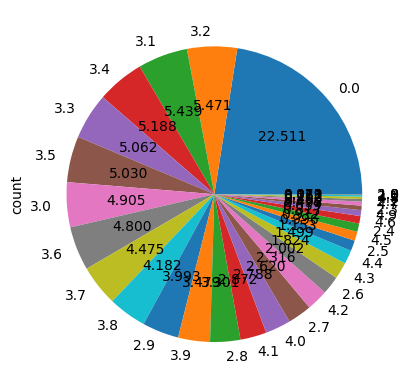

In [14]:
df['Aggregate rating'].value_counts().plot(kind='pie', autopct='%.3f')

<ipython-input-15-00528cf33232>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Aggregate rating'])


<Axes: xlabel='Aggregate rating', ylabel='Density'>

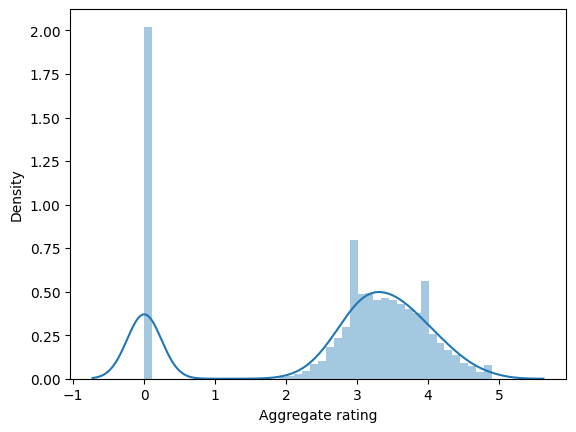

In [15]:
sns.distplot(df['Aggregate rating'])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

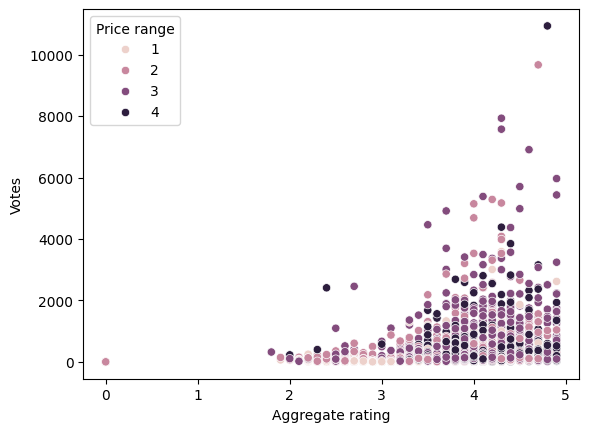

In [16]:
sns.scatterplot(x=df['Aggregate rating'], y=df['Votes'], hue=df['Price range'])

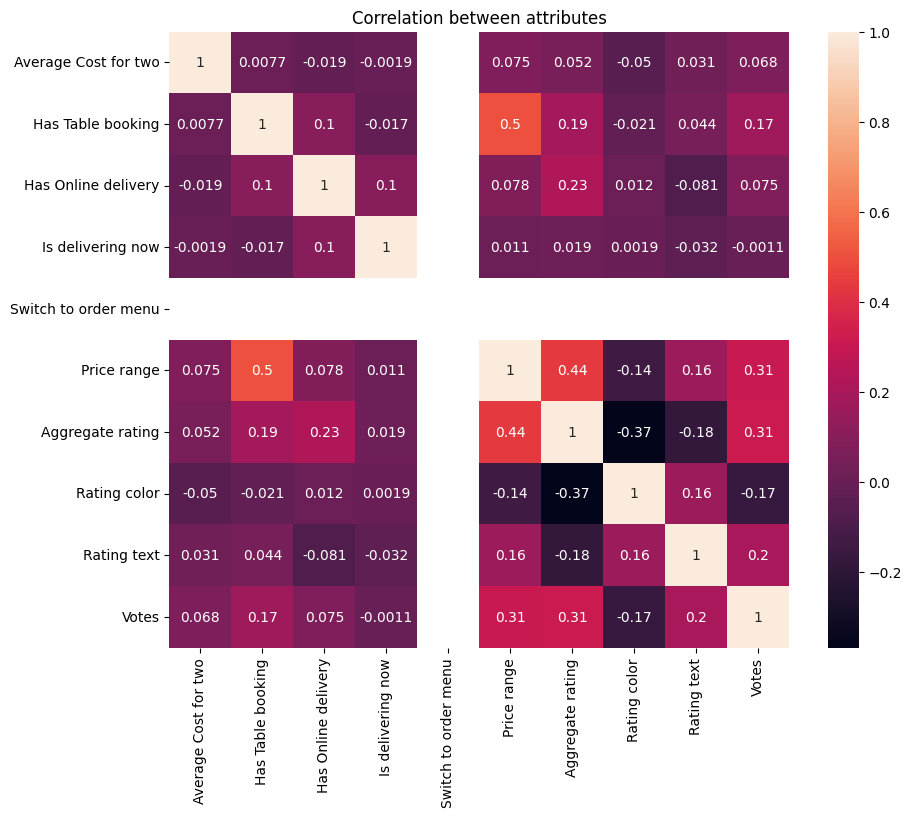

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between attributes")
plt.show()

In [18]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [19]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=250)

In [20]:
x_train.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
5883,400,0,1,0,0,1,5,2,121
5470,200,0,0,0,0,1,2,0,15
5790,200,0,0,0,0,1,4,3,0
5588,200,0,0,0,0,1,4,3,1
9283,800000,0,0,0,0,3,1,5,1498


In [21]:
x_test.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
5586,300,0,0,0,0,1,4,3,0
7836,500,0,0,0,0,2,4,3,0
5100,500,0,0,0,0,2,2,0,13
3550,500,0,1,0,0,2,5,2,359
7593,250,0,0,0,0,1,4,3,2


In [22]:
print("x_train data: ", x_train.shape)
print("x_test data: ",x_test.shape)
print("y_train data: ",y_train.shape)
print("y_test data: ",y_test.shape)

x_train data:  (7633, 9)
x_test data:  (1909, 9)
y_train data:  (7633,)
y_test data:  (1909,)


**Linear Regression Model**

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_prediction = lr.predict(x_test)

In [24]:
#evaluating performace metrics
lr_mae = mean_absolute_error(y_test, lr_prediction)
lr_mse = mean_squared_error(y_test, lr_prediction)
lr_r2 = r2_score(y_test, lr_prediction)

In [25]:
print(f"Mean Absolute Error of the linear regression model is: {lr_mae:.2f}")
print(f"Mean Squared Error of the linear regression model is: {lr_mse:.2f}")
print(f"R2 score of the linear regression model is: {lr_r2:.2f}")

Mean Absolute Error of the linear regression model is: 1.00
Mean Squared Error of the linear regression model is: 1.42
R2 score of the linear regression model is: 0.39


**Decision Tree**

In [26]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt_prediction = dt.predict(x_test)

In [27]:
#evaluating performace metrics
dt_mae = mean_absolute_error(y_test, dt_prediction)
dt_mse = mean_squared_error(y_test, dt_prediction)
dt_r2 = r2_score(y_test, dt_prediction)

In [28]:
print(f"Mean Absolute Error of the decision tree model is: {dt_mae:.2f}")
print(f"Mean Squared Error of the decision tree model is: {dt_mse:.2f}")
print(f"R2 score of the linear regression model is: {dt_r2:.2f}")

Mean Absolute Error of the decision tree model is: 0.15
Mean Squared Error of the decision tree model is: 0.05
R2 score of the linear regression model is: 0.98


**Model achieves 98% accuracy**

MSE of 0.05 indicates that model's predictions are very accurate & low errors.

R2 value of 0.98 suggests that model is highly effective at explaining & predicting the target variable.

Decision Tree Regressor model is performing exceptionally well on the test data.

**Analysing the factors affecting restaurant ratings**



1.   Distribution of the target variable ("Aggregate rating") is well
balanced.
2.   
Expensive restaurants (higher price range) tend to have higher ratings.


